Belajar Pengembangan Machine Learning<br>
Proyek Pertama : Membuat Model NLP dengan TensorFlow<br>
Nama  : Yagy Christoper Sumule<br>
Email : yagybatman@gmail.com

Kriteria: 
* Dataset yang akan dipakai bebas, namun minimal memiliki 1000 sampel.
* Harus menggunakan LSTM dalam arsitektur model.
* Harus menggunakan model sequential.
* Validation set sebesar 20% dari total dataset.
* Harus menggunakan Embedding.
* Harus menggunakan fungsi tokenizer.
* Akurasi dari model minimal 75% pada train set dan validation set.
---
Anda dapat menerapkan beberapa saran untuk mendapatkan nilai tinggi, berikut sarannya:
* Akurasi dari model di atas 80%.
* Mengimplementasikan callback.
* Membuat plot loss dan akurasi pada saat training dan validation.
---
Detail penilaian submission:
* Bintang 5 : Semua ketentuan terpenuhi, dataset memiliki 3 kelas atau lebih dan minimal 2000 sampel data. Serta akurasi pada training set dan validation set di atas 90%.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import matplotlib.pyplot as plt
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
df = pd.read_csv('subjects-questions.csv')

In [3]:
df.head()

,eng,Subject
0,An anti-forest measure is\nA. Afforestation\nB...,Biology
1,"Among the following organic acids, the acid pr...",Chemistry
2,If the area of two similar triangles are equal...,Maths
3,"In recent year, there has been a growing\nconc...",Biology
4,Which of the following statement\nregarding tr...,Physics


In [4]:
df.isnull().values.any()

False

In [5]:
# case folding
def clean_lower(lwr):
  lwr = lwr.lower() # lowercase text
  return lwr

# Buat kolom tambahan untuk data description yang telah dicasefolding  
df['lwr'] = df['eng'].apply(clean_lower)
casefolding=pd.DataFrame(df['lwr'])
casefolding

,lwr
0,an anti-forest measure is\na. afforestation\nb...
1,"among the following organic acids, the acid pr..."
2,if the area of two similar triangles are equal...
3,"in recent year, there has been a growing\nconc..."
4,which of the following statement\nregarding tr...
...,...
122514,which of the following group of\ncharacters is...
122515,light year is the\na. light emitted by the sun...
122516,member of dipnoi are native of\na. india.\nb. ...
122517,"in one average-life,\na. half the active nucle..."


In [6]:
#Remove Puncutuation
clean_spcl = re.compile('[/(){}\[\]\|@,;]')
clean_symbol = re.compile('[^0-9a-z]')
def clean_punct(text):
    text = clean_spcl.sub('', text)
    text = clean_symbol.sub(' ', text)
    return text

# Buat kolom tambahan untuk data description yang telah diremovepunctuation   
df['clean_punct'] = df['lwr'].apply(clean_punct)
df['clean_punct']

0         an anti forest measure is a  afforestation b  ...
1         among the following organic acids the acid pre...
2         if the area of two similar triangles are equal...
3         in recent year there has been a growing concer...
4         which of the following statement regarding tra...
                                ...                        
122514    which of the following group of characters is ...
122515    light year is the a  light emitted by the sun ...
122516    member of dipnoi are native of a  india  b  af...
122517    in one average life a  half the active nuclei ...
122518    state whether true or false  a magnetic field ...
Name: clean_punct, Length: 122519, dtype: object

In [7]:
#clean stopwords
stopword = set(stopwords.words('english'))

def clean_stopwords(text):
    text = ' '.join(word for word in text.split() if word not in stopword) # hapus stopword dari kolom deskripsi
    return text

# Buat kolom tambahan untuk data description yang telah distopwordsremoval   
df['clean_sw'] = df['clean_punct'].apply(clean_stopwords)

add = pd.DataFrame(df['clean_sw'])
df['add_swr']= add.replace(to_replace =['whether','yes','also','thanks','take','whatever',
                    'making','makes','taking','takes','ok','oh','etc',
                                        "yep"],  
                            value ="", regex= True) 
df['add_swr']

0         anti forest measure afforestation b selective ...
1         among following organic acids acid present ran...
2         area two similar triangles equal equilateral b...
3         recent year growing concern gradually increasi...
4         following statement regarding transformer inco...
                                ...                        
122514    following group characters present chordates s...
122515    light year light emitted sun one year b time n...
122516    member dipnoi native india b africa australia ...
122517    one average life half active nuclei decay b le...
122518    state  true false magnetic field region around...
Name: add_swr, Length: 122519, dtype: object

In [8]:
df.head()

,eng,Subject,lwr,clean_punct,clean_sw,add_swr
0,An anti-forest measure is\nA. Afforestation\nB...,Biology,an anti-forest measure is\na. afforestation\nb...,an anti forest measure is a afforestation b ...,anti forest measure afforestation b selective ...,anti forest measure afforestation b selective ...
1,"Among the following organic acids, the acid pr...",Chemistry,"among the following organic acids, the acid pr...",among the following organic acids the acid pre...,among following organic acids acid present ran...,among following organic acids acid present ran...
2,If the area of two similar triangles are equal...,Maths,if the area of two similar triangles are equal...,if the area of two similar triangles are equal...,area two similar triangles equal equilateral b...,area two similar triangles equal equilateral b...
3,"In recent year, there has been a growing\nconc...",Biology,"in recent year, there has been a growing\nconc...",in recent year there has been a growing concer...,recent year growing concern gradually increasi...,recent year growing concern gradually increasi...
4,Which of the following statement\nregarding tr...,Physics,which of the following statement\nregarding tr...,which of the following statement regarding tra...,following statement regarding transformer inco...,following statement regarding transformer inco...


In [9]:
course = pd.get_dummies(df.Subject)
df_baru = pd.concat([df, course], axis=1)
df_baru = df_baru.drop(columns='Subject')
df_baru = df_baru.drop(columns='eng')
df_baru = df_baru.drop(columns='lwr')
df_baru = df_baru.drop(columns='clean_punct')
df_baru = df_baru.drop(columns='clean_sw')
df_baru.head()

,add_swr,Biology,Chemistry,Maths,Physics
0,anti forest measure afforestation b selective ...,1,0,0,0
1,among following organic acids acid present ran...,0,1,0,0
2,area two similar triangles equal equilateral b...,0,0,1,0
3,recent year growing concern gradually increasi...,1,0,0,0
4,following statement regarding transformer inco...,0,0,0,1


In [10]:
questions= df_baru['add_swr'].values
label = df_baru[['Biology', 'Chemistry', 'Maths', 'Physics']].values

In [11]:
questions_latih, questions_test, label_latih, label_test = train_test_split(questions, label, test_size=0.2)

In [12]:
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(questions_latih)
tokenizer.fit_on_texts(questions_test)

sekuens_latih = tokenizer.texts_to_sequences(questions_latih)
sekuens_test = tokenizer.texts_to_sequences(questions_test)

padded_latih = pad_sequences(sekuens_latih,
                             padding='post',
                             maxlen=200,
                             truncating='post')
padded_test = pad_sequences(sekuens_test,
                            padding='post',
                            maxlen=200,
                            truncating='post')

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [14]:
class Callback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > 0.90 and logs.get('val_accuracy') > 0.90):
            print("\nAkurasi > 90% ") 
            self.model.stop_training = True 
     
callbacks = Callback()

In [15]:
num_epochs = 30
history = model.fit(padded_latih, label_latih, epochs=num_epochs,
                    validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks])

Epoch 1/30
3063/3063 - 38s - loss: 1.3213 - accuracy: 0.3100 - val_loss: 1.3199 - val_accuracy: 0.3100 - 38s/epoch - 12ms/step
Epoch 2/30
3063/3063 - 30s - loss: 1.3205 - accuracy: 0.3114 - val_loss: 1.3185 - val_accuracy: 0.3100 - 30s/epoch - 10ms/step
Epoch 3/30
3063/3063 - 29s - loss: 1.3202 - accuracy: 0.3131 - val_loss: 1.3190 - val_accuracy: 0.3177 - 29s/epoch - 10ms/step
Epoch 4/30
3063/3063 - 29s - loss: 1.3202 - accuracy: 0.3105 - val_loss: 1.3189 - val_accuracy: 0.3177 - 29s/epoch - 9ms/step
Epoch 5/30
3063/3063 - 29s - loss: 1.3202 - accuracy: 0.3087 - val_loss: 1.3187 - val_accuracy: 0.3100 - 29s/epoch - 9ms/step
Epoch 6/30
3063/3063 - 29s - loss: 1.3201 - accuracy: 0.3085 - val_loss: 1.3194 - val_accuracy: 0.3177 - 29s/epoch - 9ms/step
Epoch 7/30
3063/3063 - 29s - loss: 1.3201 - accuracy: 0.3111 - val_loss: 1.3189 - val_accuracy: 0.3100 - 29s/epoch - 9ms/step
Epoch 8/30
3063/3063 - 29s - loss: 1.3201 - accuracy: 0.3102 - val_loss: 1.3185 - val_accuracy: 0.3100 - 29s/epoch 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'Train' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  


<function matplotlib.pyplot.show(*args, **kw)>

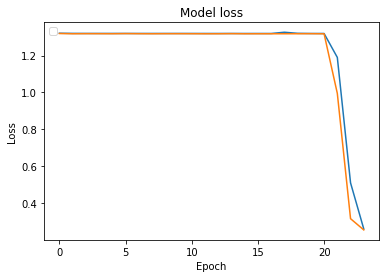

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], ['Test'], loc='upper left')
plt.show

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'Train' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  


<function matplotlib.pyplot.show(*args, **kw)>

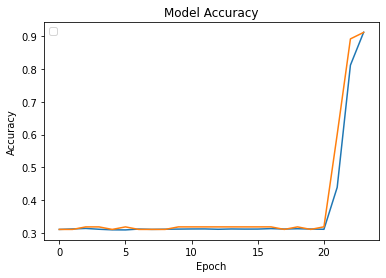

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], ['Test'], loc='upper left')
plt.show